In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,
                            mean_absolute_error, 
                            r2_score
import seaborn as sns

In [2]:
df_estacao = pd.read_csv("DATA/dados_estacoes_2015-2017.csv",
        parse_dates=["DATE"],
        index_col=["DATE"])

df_radar = pd.read_csv("DATA/radar.csv",
                      parse_dates=['date'],
                      index_col=["date"])

In [3]:
df_estacao.sort_index().index.to_series().describe()

count                        1741022
unique                       1740045
top              2018-02-01 05:34:00
freq                               2
first            2015-01-01 00:00:00
last      2018-04-23 23:59:02.900000
Name: DATE, dtype: object

In [4]:
df_radar.sort_index().index.to_series().describe()

count                   65581
unique                  65581
top       2016-03-22 14:15:00
freq                        1
first     2016-01-01 00:05:00
last      2018-06-13 23:55:00
Name: date, dtype: object

In [5]:
def compare(station,period,df_estacao,df_radar, df_return= False):
    
   
    df_estacao_freg = df_estacao.groupby(pd.Grouper(freq=period)).sum()
    df_radar_freg = df_radar.groupby(pd.Grouper(freq=period)).sum()
    
    df_estacao_station = df_estacao_freg[station]
    df_radar_station = df_radar_freg[station]
    
    df_estacao_station = df_estacao_station.rename(station + "_ESTACAO")
    df_radar_station = df_radar_station.rename(station + "_RADAR")
    
    
    df = pd.concat([df_estacao_station,df_radar_station],axis=1)
    
    df.dropna(inplace=True)
    

    
    y = df[station + "_ESTACAO"]
    y_pred = df[station + "_RADAR"]

 
    
    plt.figure(1, figsize=(10,10))
    plt.suptitle(station, fontsize=18)
    

    plt.style.use("seaborn")
    plt.subplot(111)
    plt.ylim(bottom=-1, top=70)
    plt.xlim(-1, 70)
    plt.scatter(df[station + "_RADAR"],df[station + "_ESTACAO"])
    sns.regplot(y_pred,y, ci=None)
    plt.xlabel("Radar (mm)")
    plt.ylabel("Estação (mm)")
    plt.text(55,10, f'MSE = {round(mean_squared_error(y, y_pred),2)}', fontsize=15)
    plt.text(55,7, f'MAE = {round(mean_absolute_error(y, y_pred),2)}', fontsize=15)
    plt.text(55,4, f'R2 = {round(r2_score(y, y_pred),2)}', fontsize=15)
    
    

    plt.show()
    if df_return:
        return df
    
    

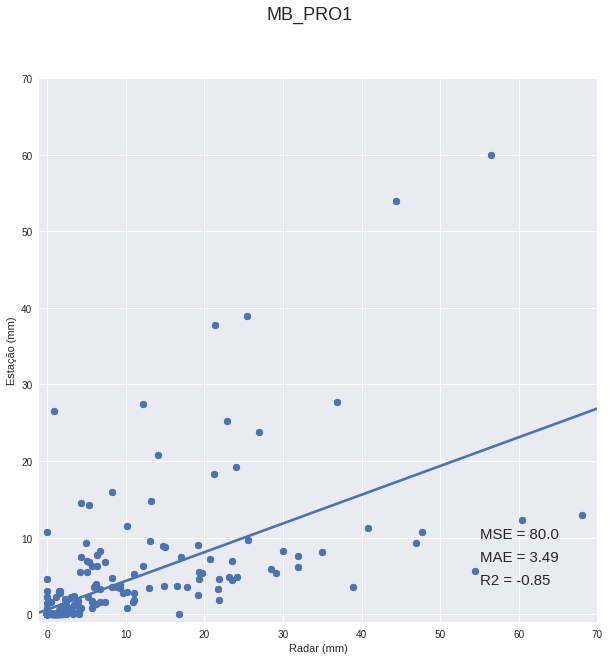

In [10]:
compare("MB_PRO1","24H",df_estacao["2017"],df_radar["2017"])

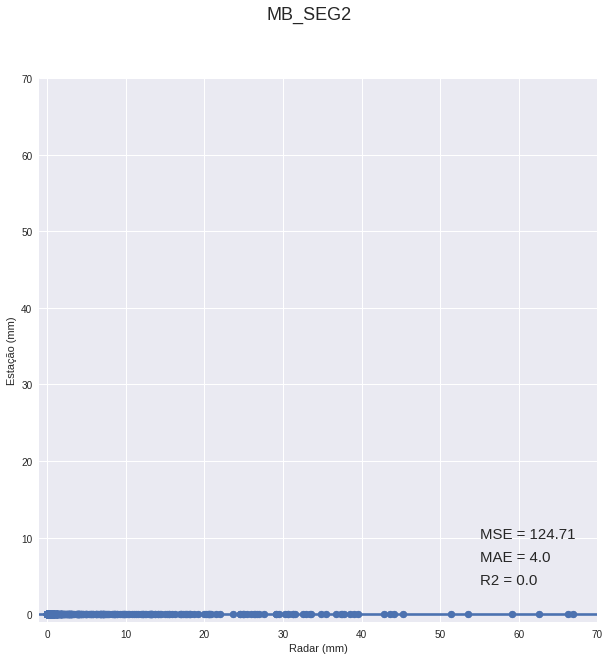

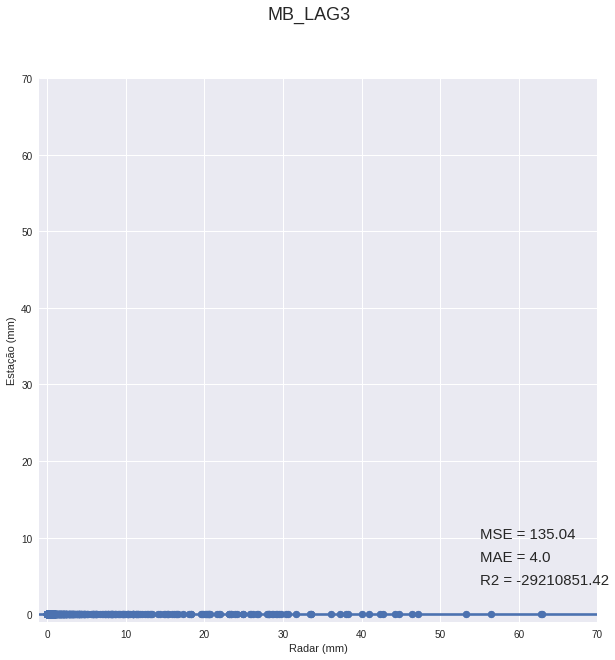

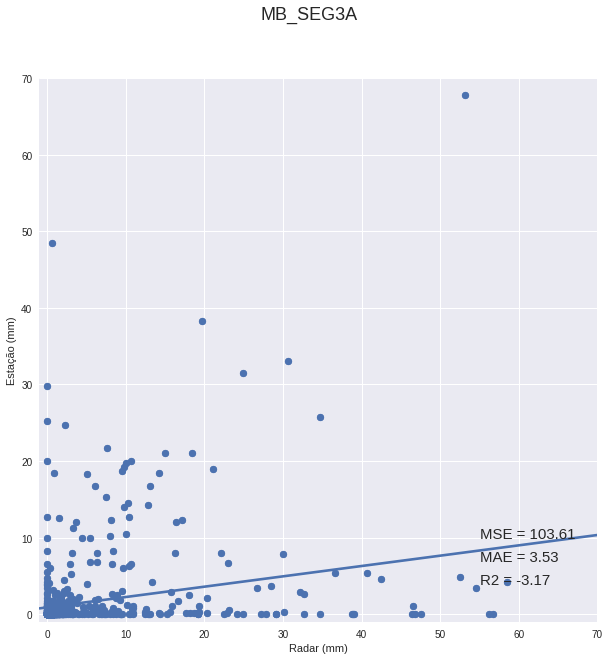

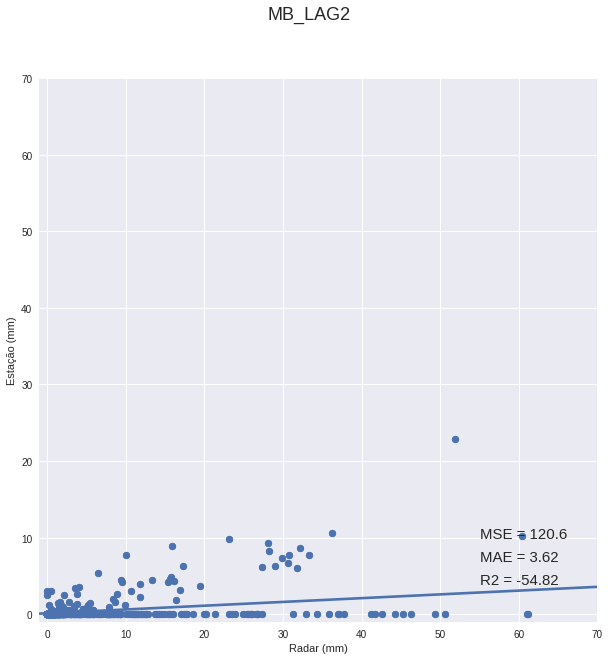

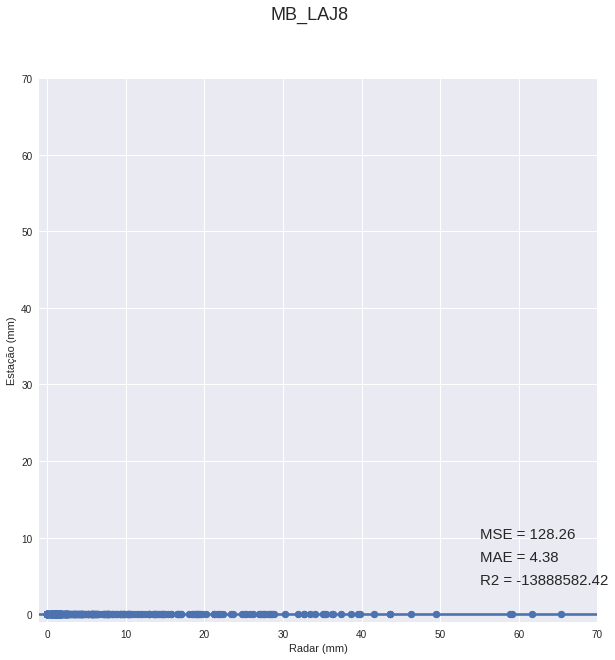

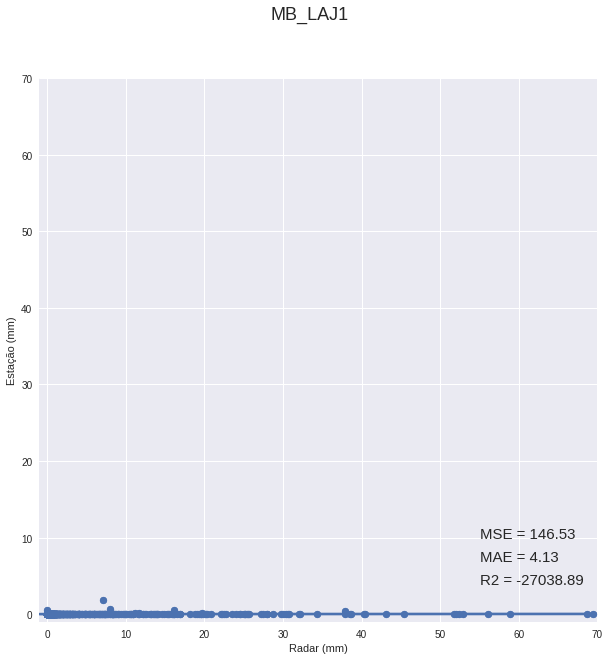

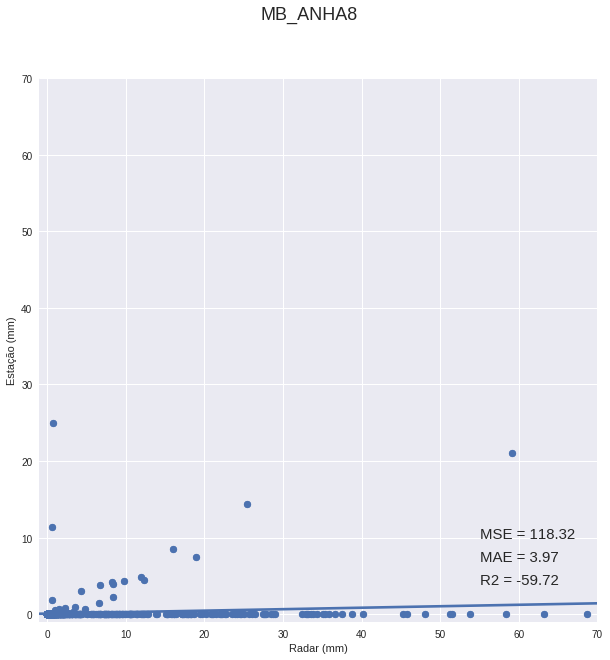

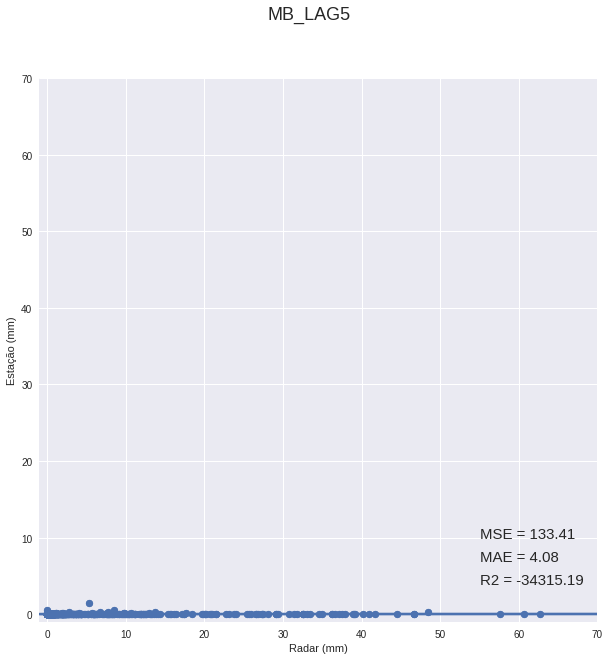

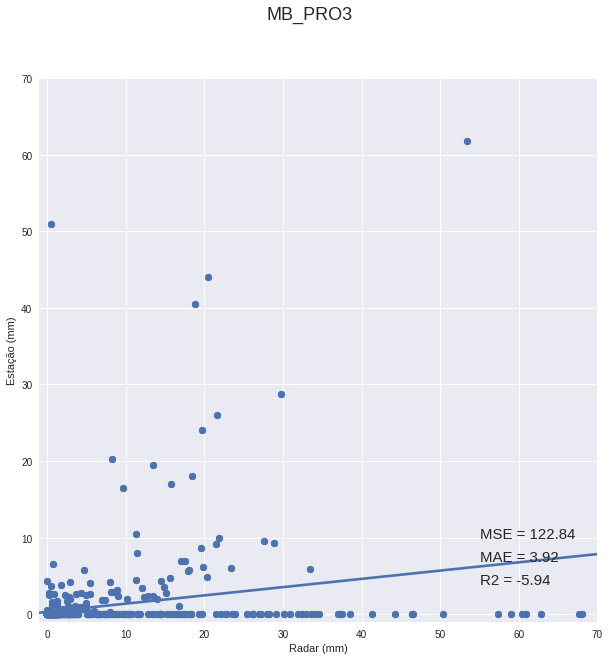

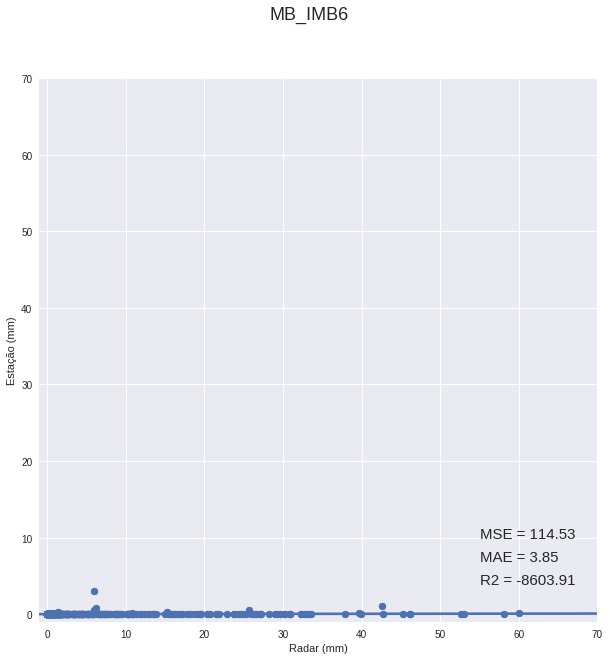

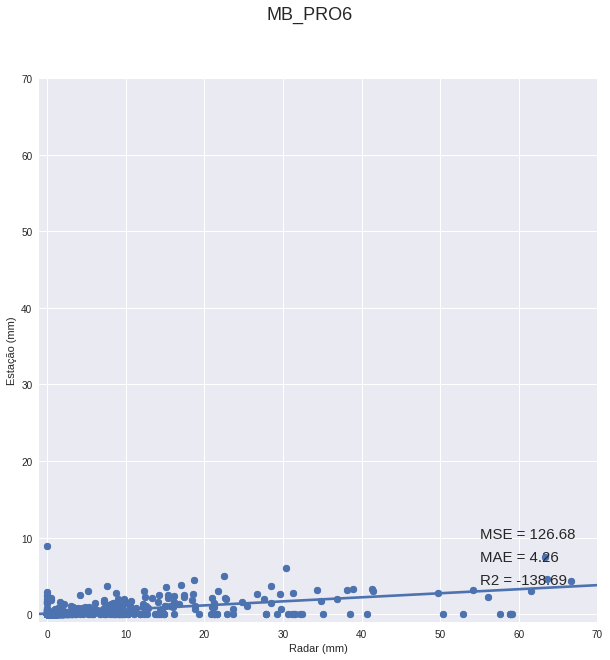

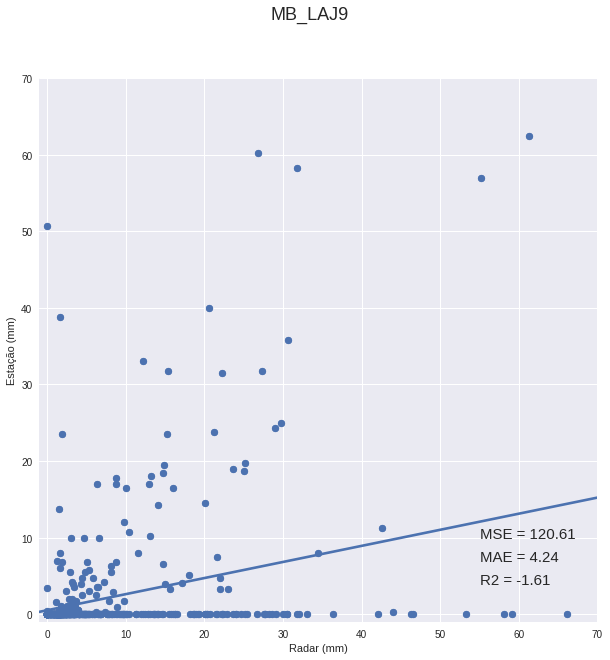

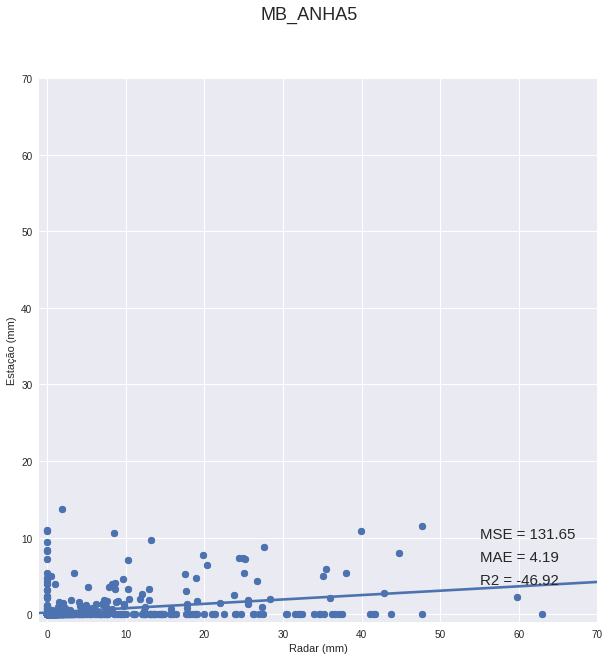

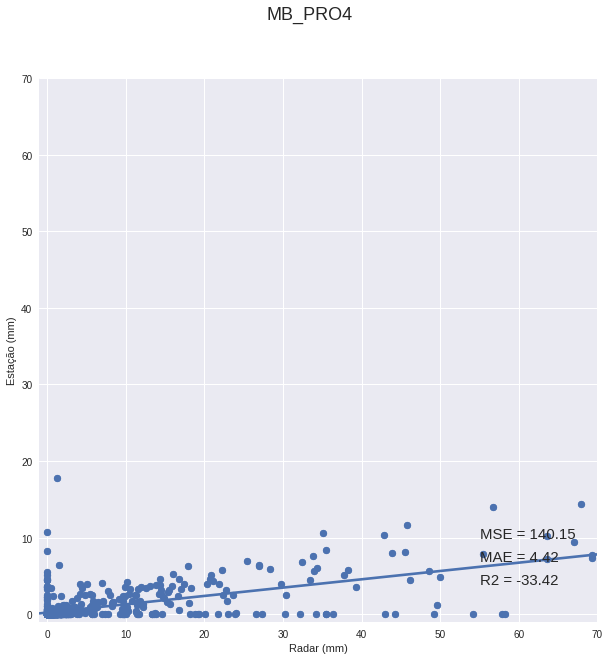

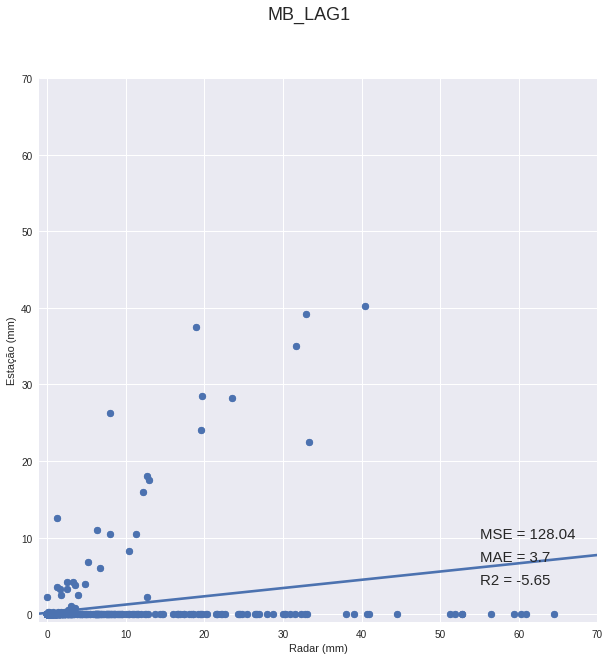

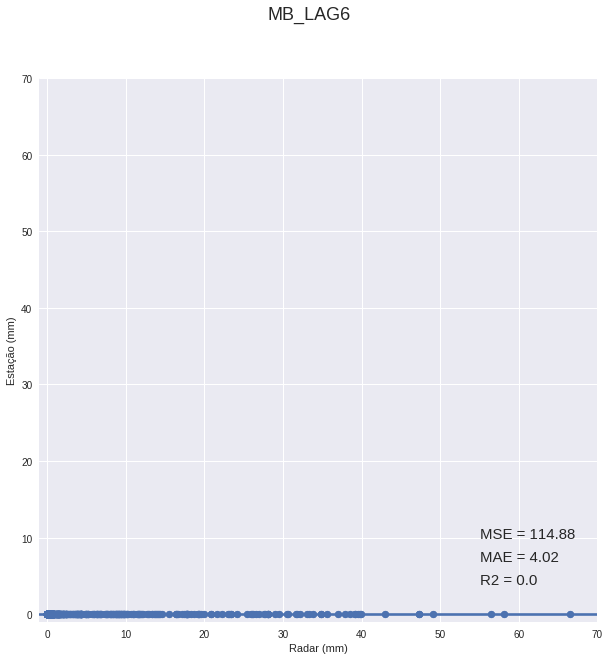

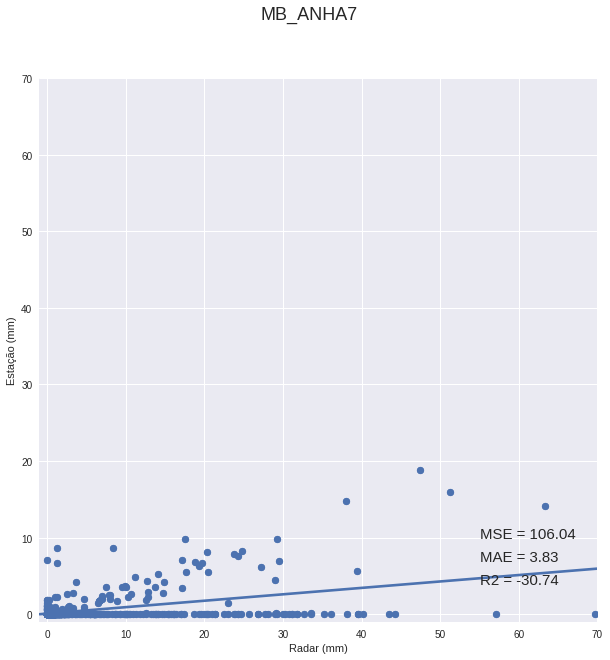

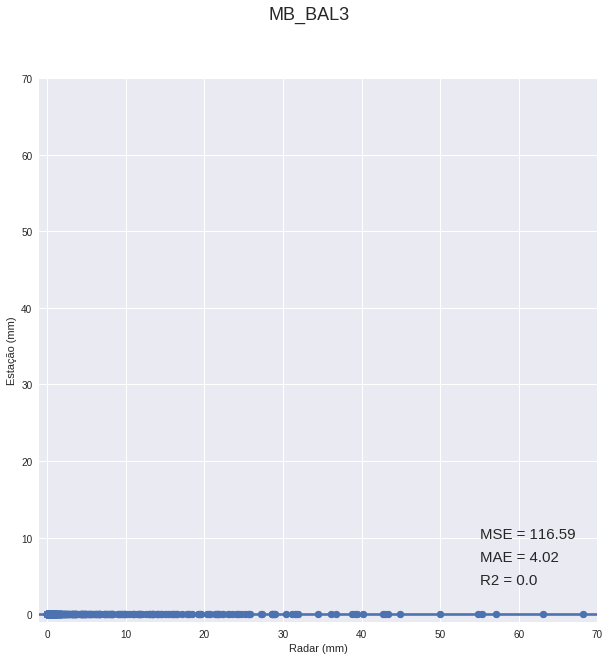

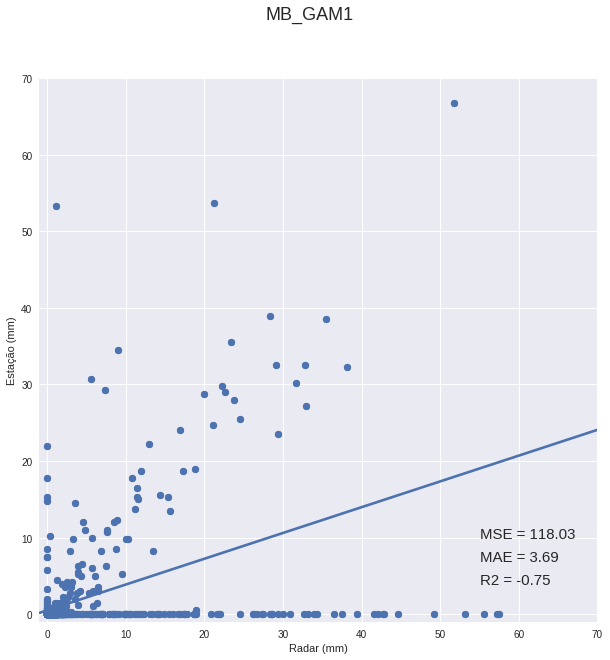

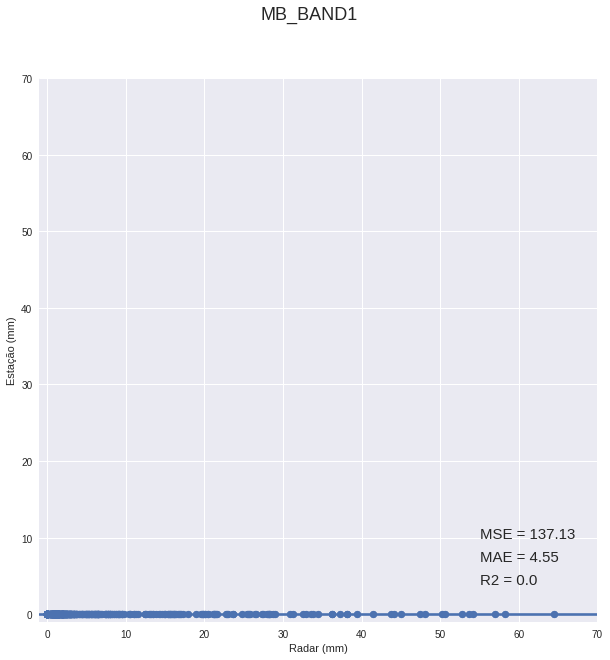

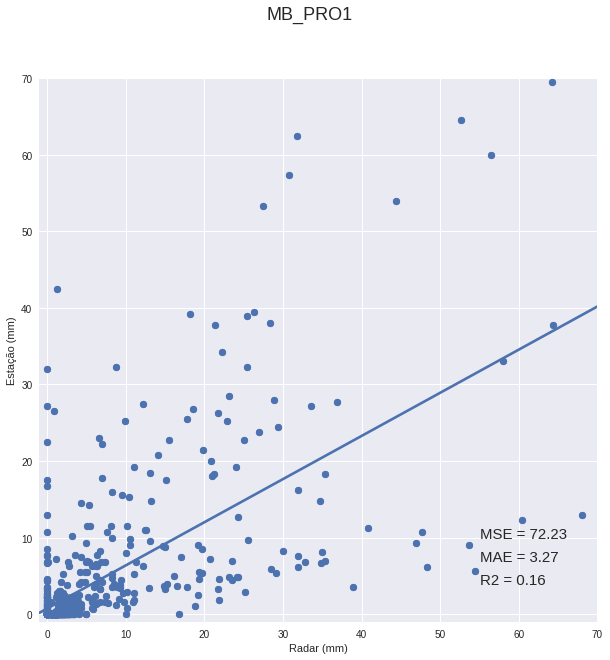

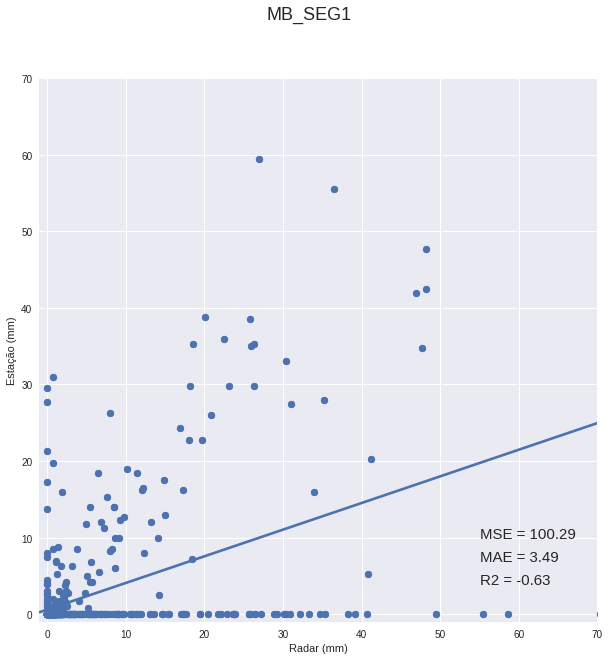

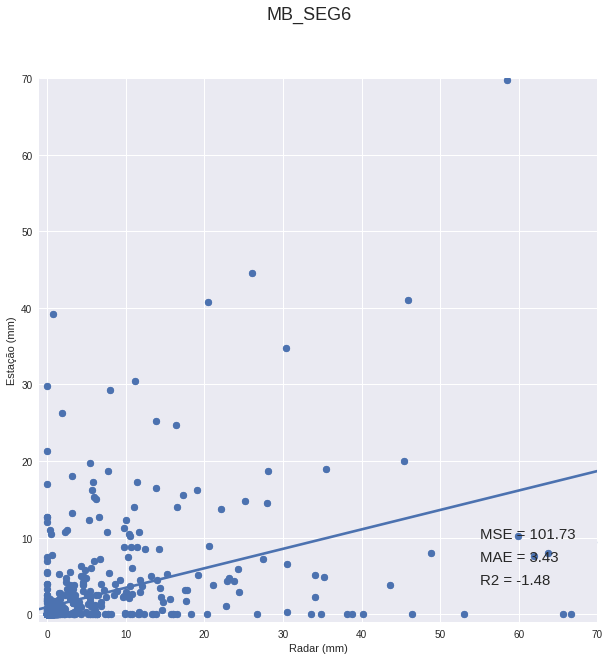

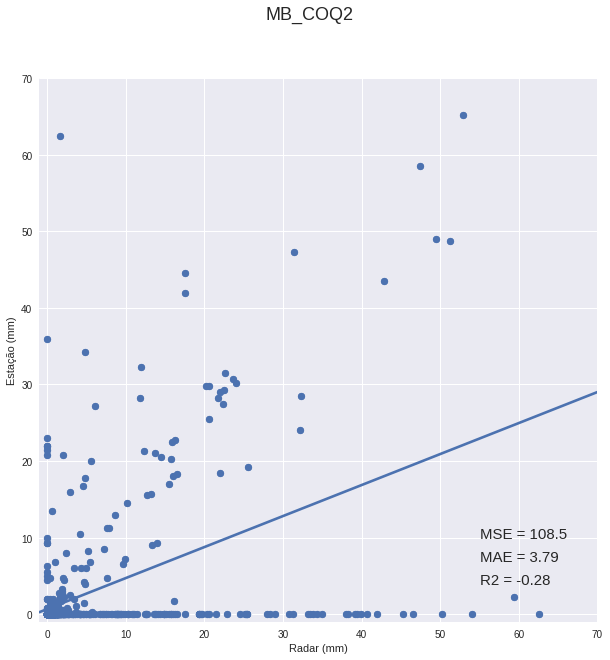

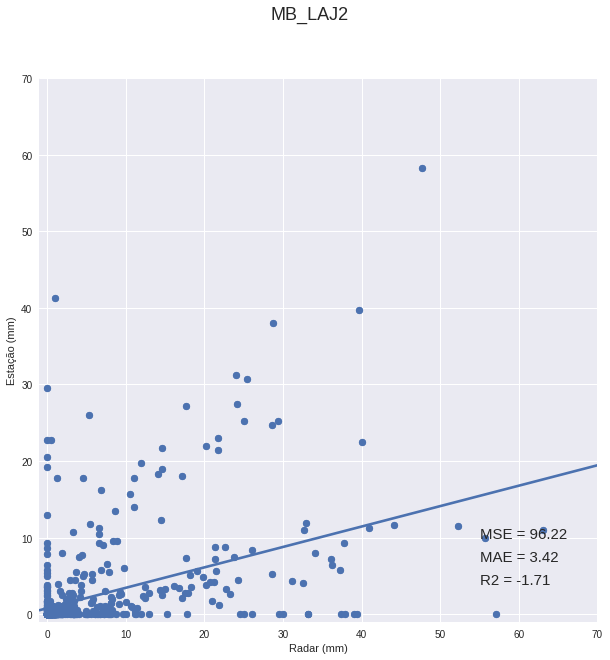

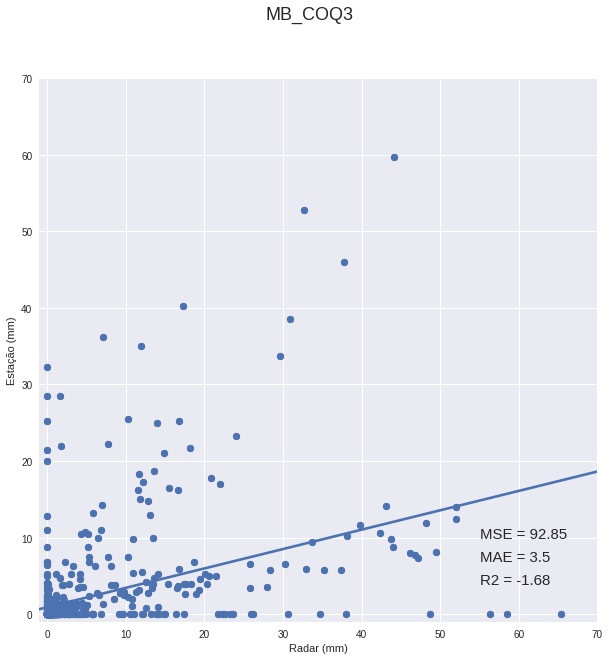

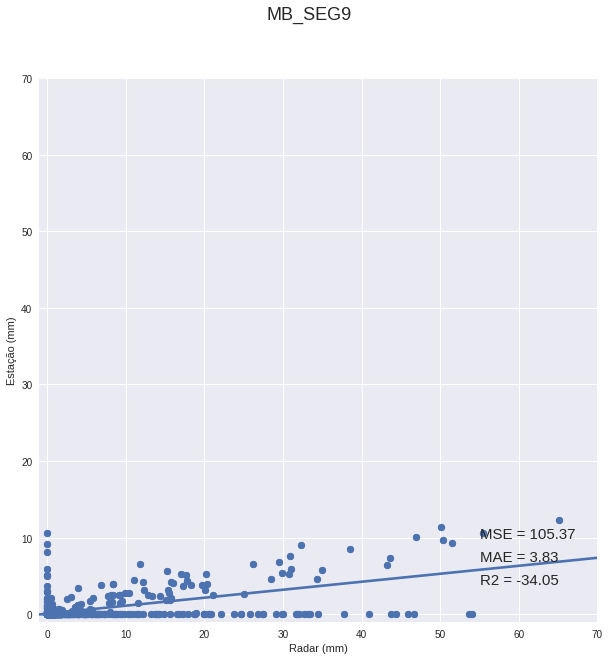

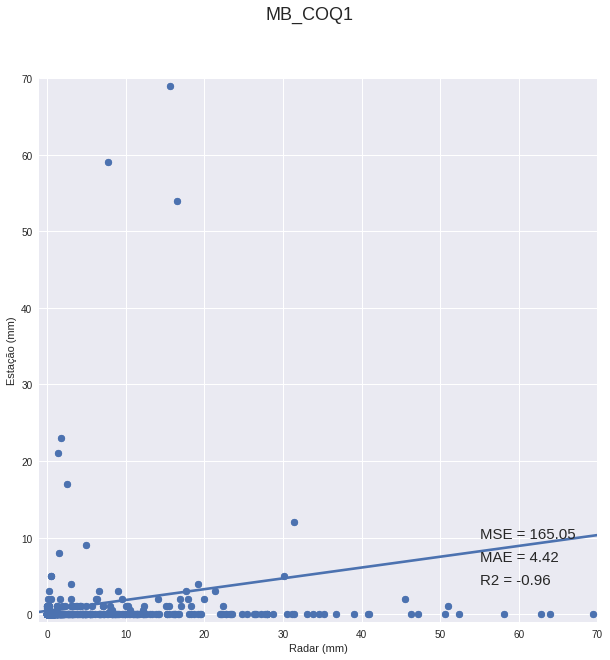

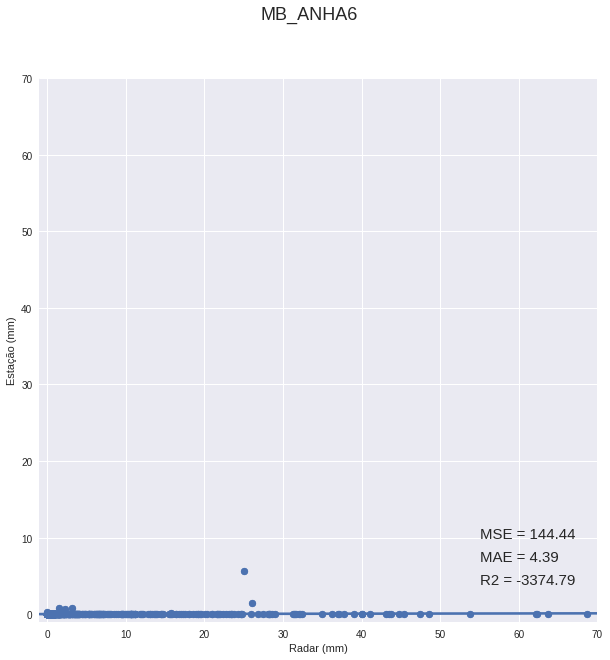

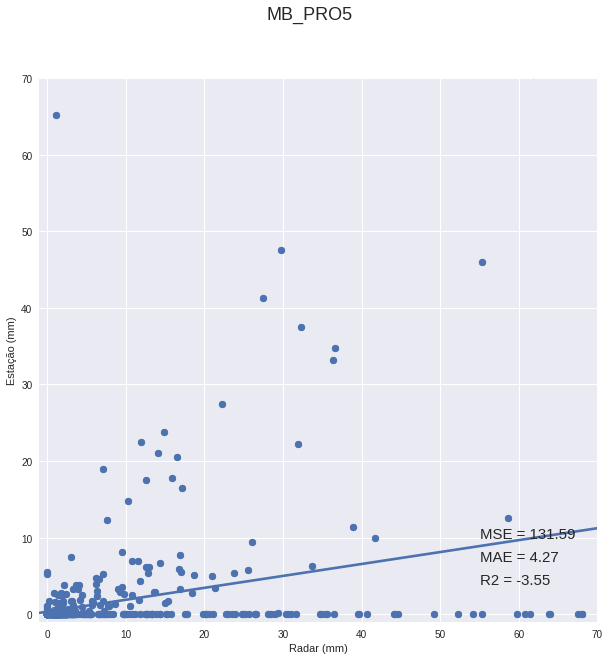

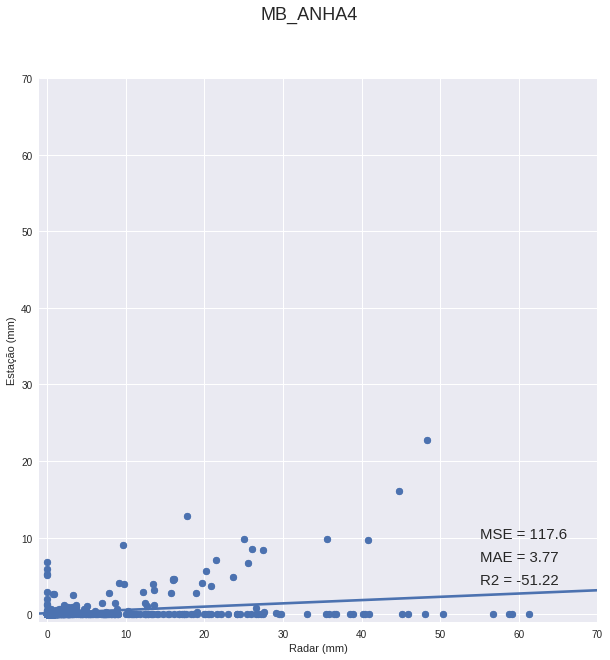

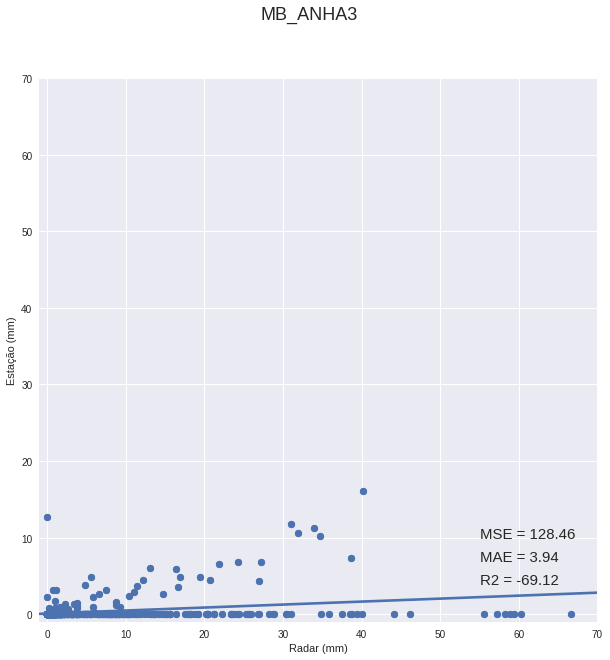

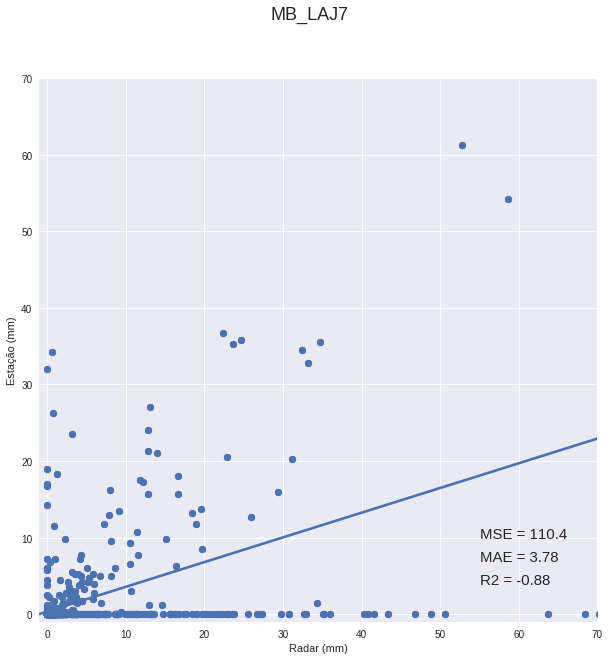

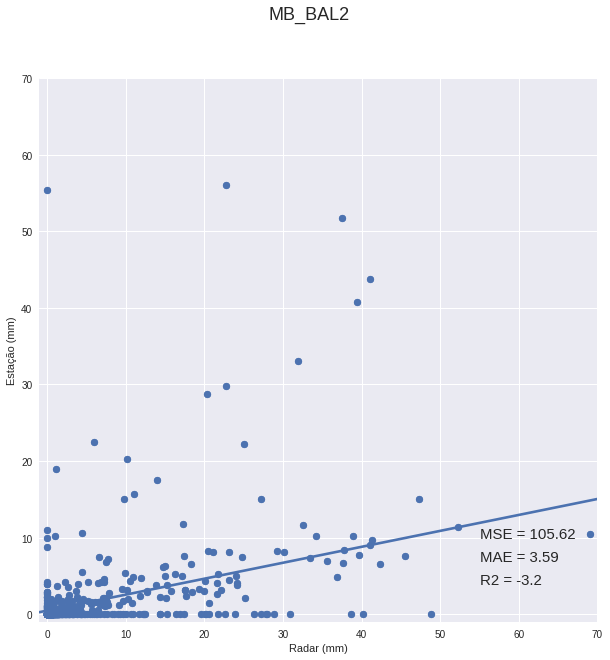

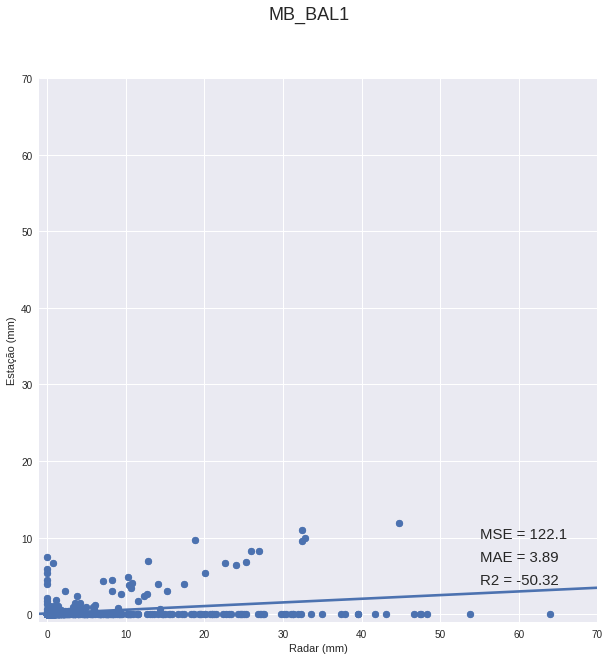

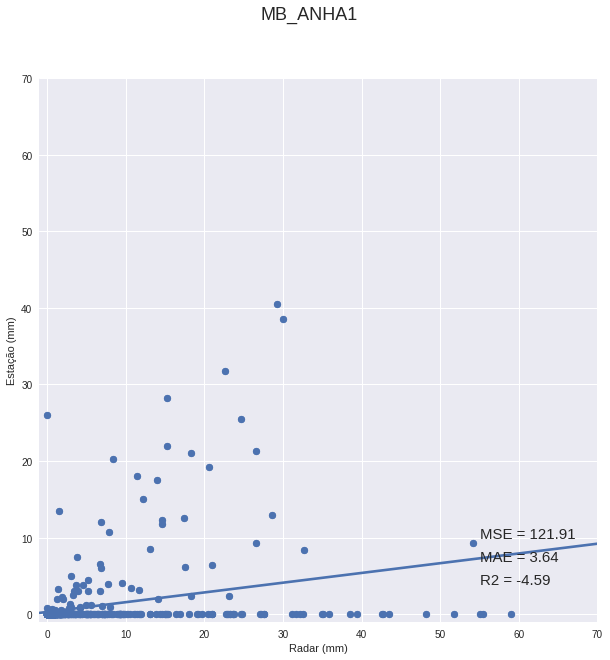

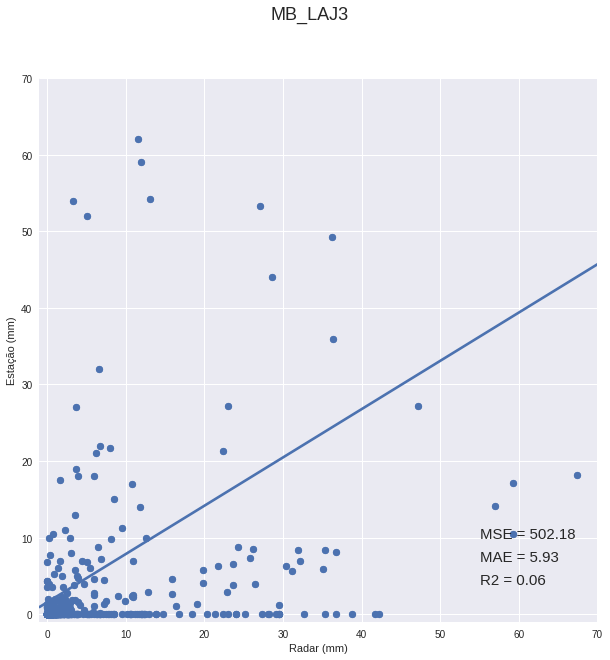

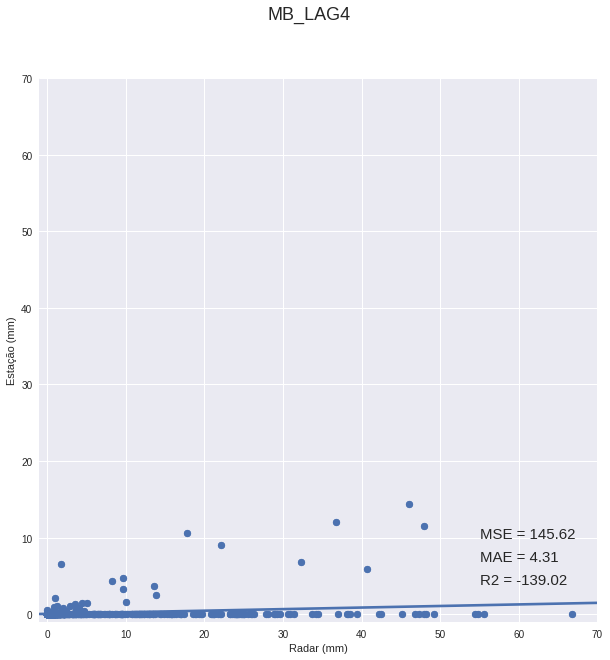

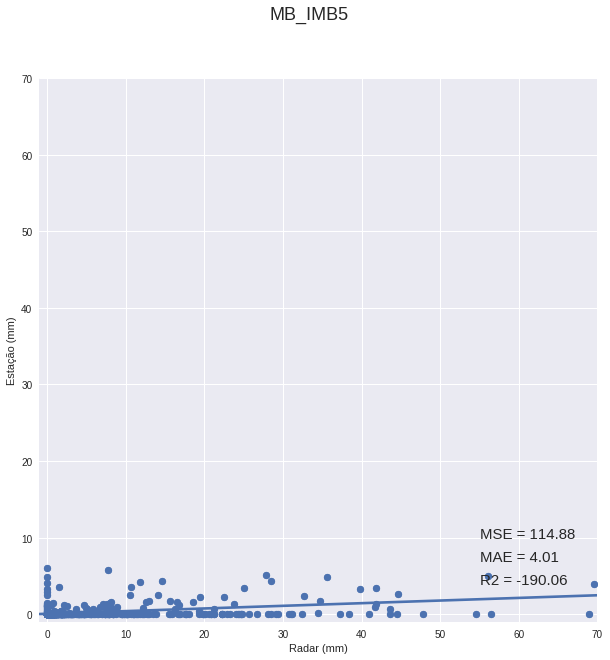

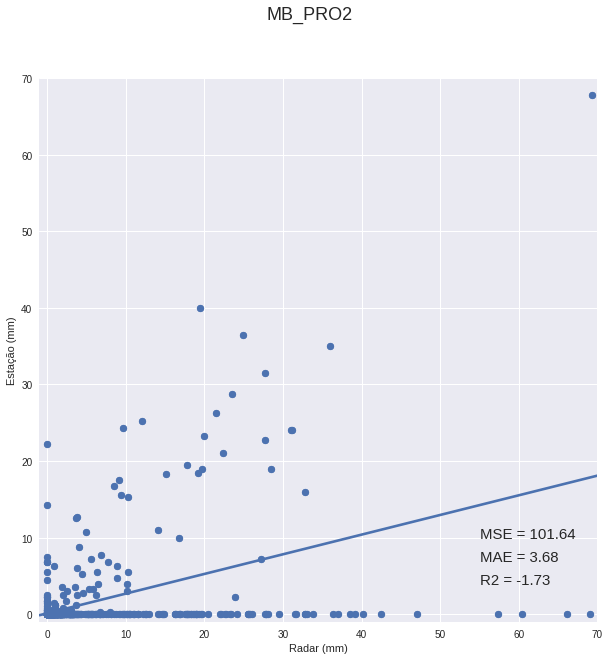

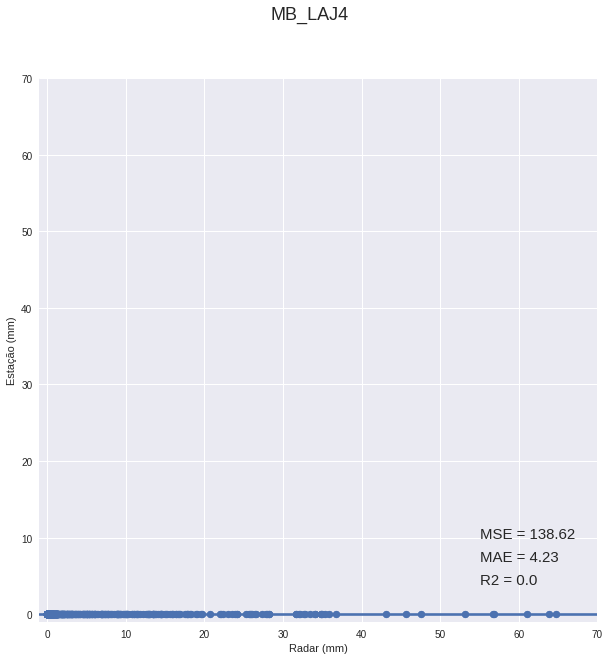

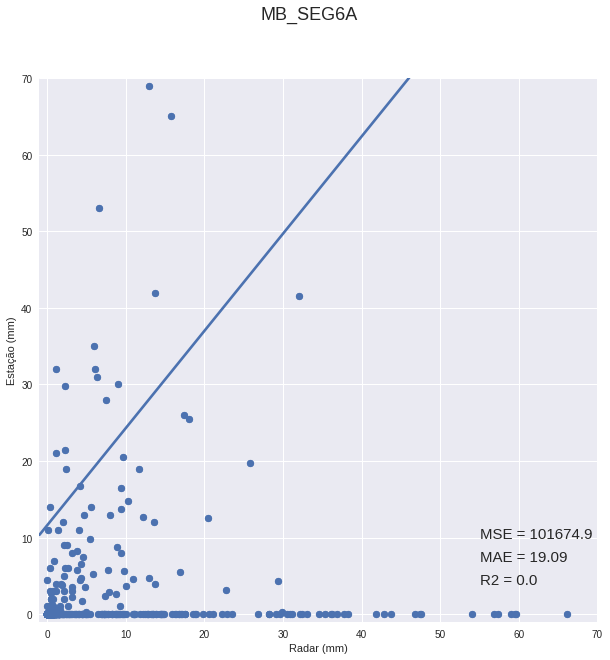

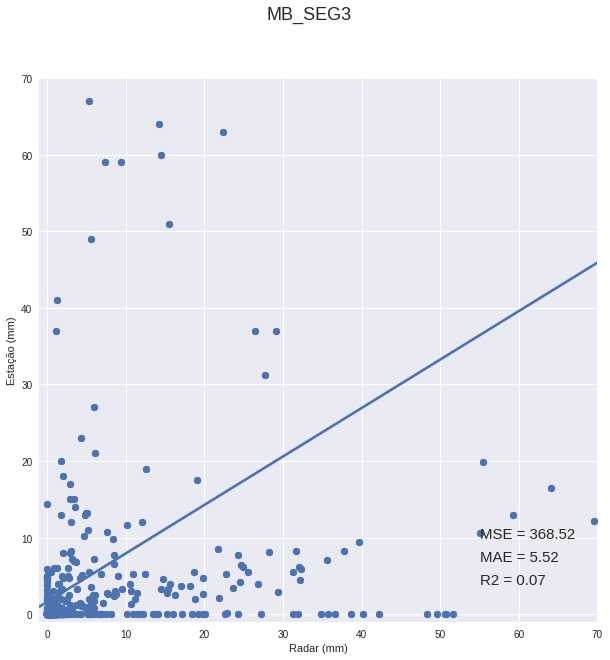

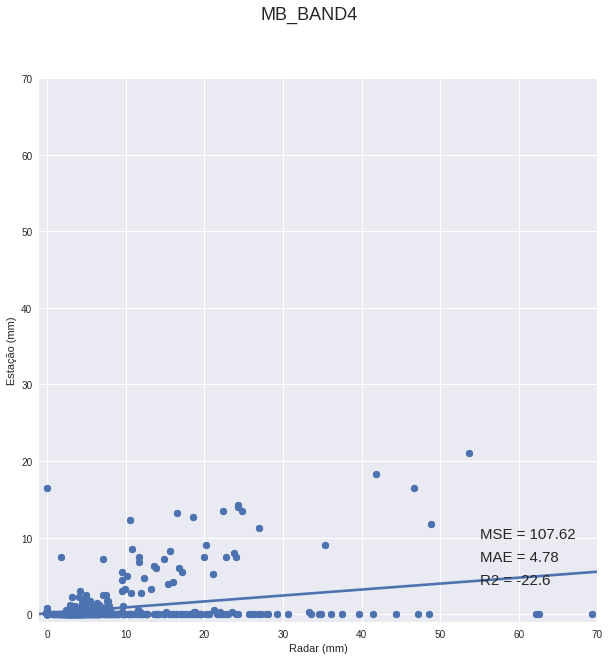

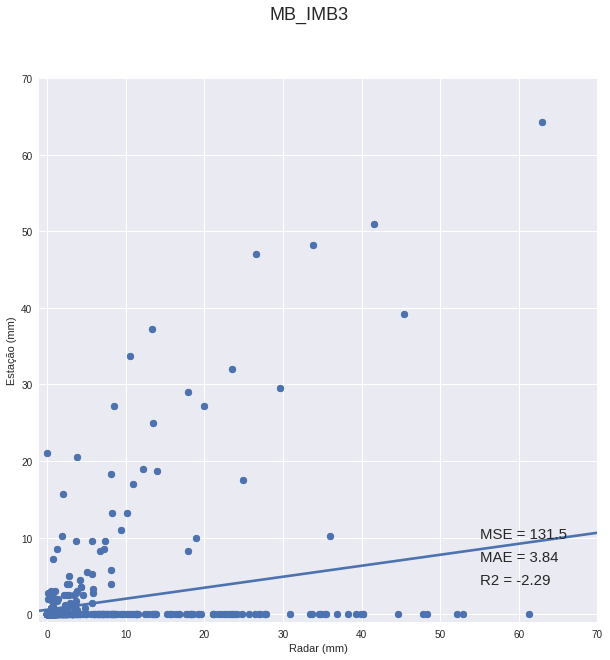

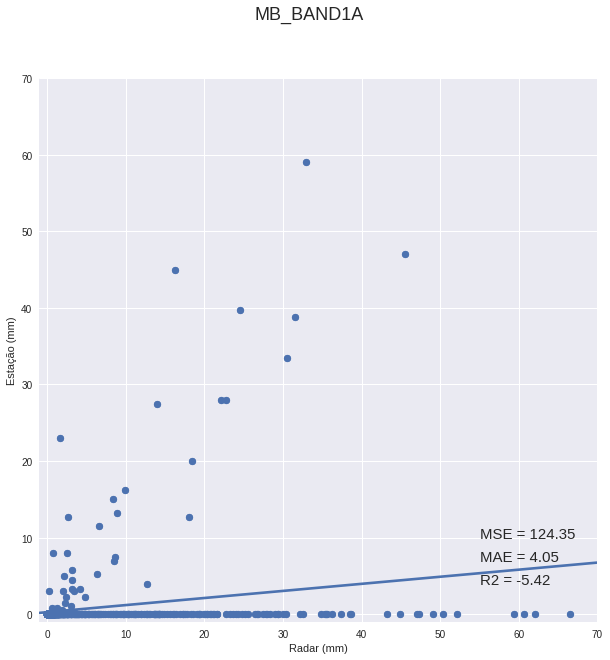

In [7]:
stations = [station for station in df_radar.columns if station in df_estacao.columns]
for station in stations:
    compare(station,"24H",df_estacao,df_radar)